In [1]:
import pandas as pd
import os
pd.set_option('display.max_rows', 500)

In [2]:
#print current working directory

print(os.getcwd())

/Users/kevintsai/Library/CloudStorage/Dropbox/Study/Python/EDA/Pandas-Data-Science-Tasks/SalesAnalysis


In [3]:
f_path = os.getcwd()

In [4]:
f_list = []
for filename in os.listdir(f_path +'/Sales_Data'):
    if ('Sales' in filename) and ('csv' in filename):
        f_list.append(filename)

In [20]:
df = pd.read_csv(f_path + '/Sales_Data/' + f_list[0])
print(df.shape)
for i in range(1,len(f_list)):
    temp = pd.read_csv(f_path + '/Sales_Data/' + f_list[i])
    df = pd.concat([df, temp])

(25117, 6)


# File Check

In [21]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

## df first 5 rows

In [22]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [24]:
fault_rows = df.query("Product == 'Product'")

df = df.drop(index = fault_rows.index)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183271 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


## Drop null rows

In [26]:
df = df.dropna()

df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### Question 1: what was the best month for sales? How much was earned that month?

In [27]:
# change datatypes

df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Price Each'] = df['Price Each'].astype('float')
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int')
#double check
print(df.info())

<ipython-input-27-e7bcc8daaa21>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


<class 'pandas.core.frame.DataFrame'>
Index: 182735 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int64         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.8+ MB
None


In [79]:
df['Order Month'] = pd.DatetimeIndex(df['Order Date']).month
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

In [80]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#### bar chart of monthly sales v.s. monthly average

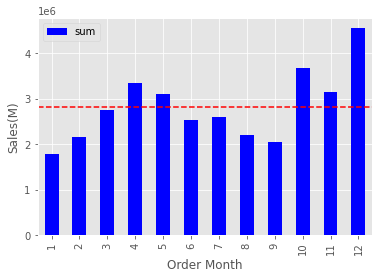

In [81]:
month_avg = df.groupby('Order Month')['Sales']\
.agg(['sum'])\
.sort_values('sum', ascending=False)\
.mean()

ax = df.groupby('Order Month')['Sales']\
.agg(['sum'])\
.plot(kind='bar', color='blue')

ax.axhline(int(month_avg.iloc[0]), color='red', linestyle ='--')
ax.set_ylabel('Sales(M)')
plt.show()

## Question 2 : What city had the highest number of sales

In [82]:
#expand address information
df[['Street', 'City', 'State']] =  df['Purchase Address'].str.split(',', expand=True)

<Axes: xlabel='City'>

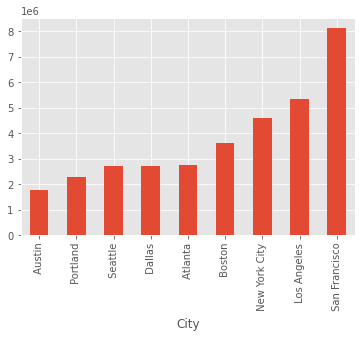

In [87]:
df.groupby('City')['Sales']\
.agg('sum')\
.sort_values()\
.plot(kind='bar')

## Question 3: What time should we display advertisements to maximize likelihood of customer buying the product?

* The peak time of customer's purchasing behavior is around 11 and 13 or 18 and 20. Hence puting advertisement arouond this time is likely to boost more sales.

In [90]:
## find the time of the day where most purchase occurs
#pd.DatetimeIndex(df['Order Date']).month
df['Order Hour'] = pd.DatetimeIndex(df['Order Date']).hour

<Axes: xlabel='Order Hour'>

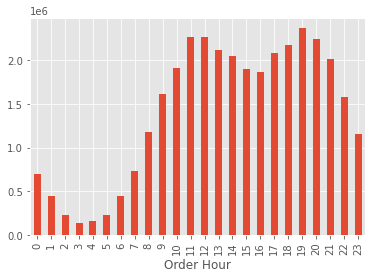

In [92]:
df.groupby('Order Hour')['Sales']\
.agg('sum')\
.plot(kind='bar')

#### maybe it's differeent by city?
* it's all the same

In [93]:
import seaborn as sns

<Axes: xlabel='Order Hour', ylabel='Sales'>

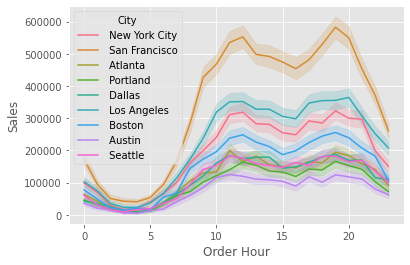

In [102]:
sns.lineplot(data = df, 
            x='Order Hour',
            y='Sales',
            estimator='sum',
            hue = 'City'
            )

### Question 4: What products are most often sold together?

In [106]:
#seems one order id may contian many items
df['Order ID'].value_counts()

Order ID
160873    5
263918    4
289117    4
277875    4
235798    4
         ..
169524    1
169525    1
169526    1
169527    1
222909    1
Name: count, Length: 175449, dtype: int64

In [119]:
df.loc[df['Order ID'] == '160873']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Total Price,Street,City,State,Sales,Order Hour,Grouped
10836,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,700.00,702 River St,San Francisco,CA 94016,700.00,10,"iPhone,Lightning Charging Cable,Apple Airpods ..."
10837,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,14.95,702 River St,San Francisco,CA 94016,14.95,10,"iPhone,Lightning Charging Cable,Apple Airpods ..."
10838,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,150.00,702 River St,San Francisco,CA 94016,150.00,10,"iPhone,Lightning Charging Cable,Apple Airpods ..."
10839,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,11.99,702 River St,San Francisco,CA 94016,11.99,10,"iPhone,Lightning Charging Cable,Apple Airpods ..."
10840,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,600.00,702 River St,San Francisco,CA 94016,600.00,10,"iPhone,Lightning Charging Cable,Apple Airpods ..."


#### Solution 1 : Correlation?

In [153]:
df.shape

(182735, 14)

In [155]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_ = df[['Order ID', 'Grouped']].drop_duplicates()

In [167]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df_['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [168]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 973),
 (('Google Phone', 'USB-C Charging Cable'), 954),
 (('iPhone', 'Wired Headphones'), 437),
 (('Google Phone', 'Wired Headphones'), 401),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 348),
 (('iPhone', 'Apple Airpods Headphones'), 343),
 (('Google Phone', 'Bose SoundSport Headphones'), 219),
 (('USB-C Charging Cable', 'Wired Headphones'), 156),
 (('Vareebadd Phone', 'Wired Headphones'), 141),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]